<a href="https://colab.research.google.com/github/apskis/data_science_ai_colab_books/blob/main/interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
    precision_score,
    recall_score,
    f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

import seaborn as sns

np.random.seed(42)


In [ ]:
# load in titanic dataset through seaborn

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

df = titanic[features + ['survived']]
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [ ]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
df.head()

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())
df.isnull().sum()

,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
survived,0
sex_male,0
embarked_Q,0
embarked_S,0


In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
y.value_counts(normalize=True)

,proportion
survived,
0,0.616162
1,0.383838


In [ ]:
coef = pd.Series(log_reg.coef_[0], index=X.columns)
coef.sort_values(ascending=False)

,0
fare,0.122761
embarked_Q,-0.042576
parch,-0.098281
embarked_S,-0.199116
sibsp,-0.350276
age,-0.406352
pclass,-0.787420
sex_male,-1.274868


<Axes: >

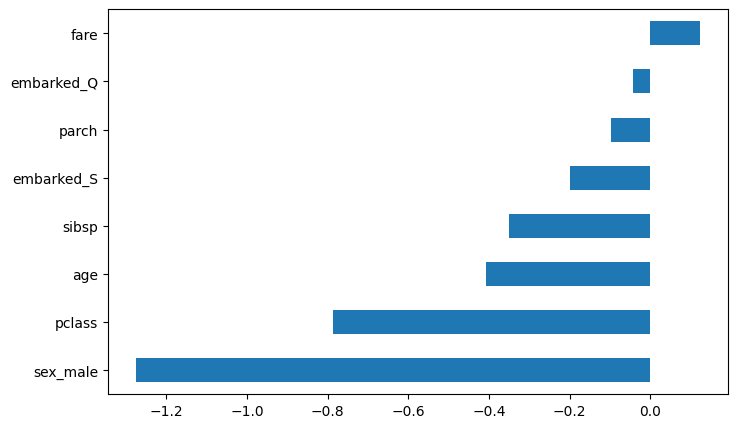

In [ ]:
plt.figure(figsize=(8, 5))
coef.sort_values().plot(kind='barh')

In [ ]:
# random forest model

rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8525280898876404, 0.8212290502793296)

In [ ]:
log_reg.score(X_train_scaled, y_train), log_reg.score(X_test_scaled, y_test)

(0.8019662921348315, 0.8100558659217877)

<Axes: >

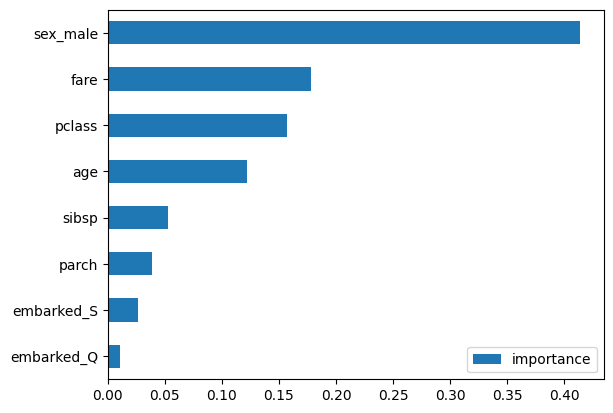

In [ ]:
rf_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
rf_importance.sort_values(by='importance', ascending=True).plot(kind='barh')

<Axes: >

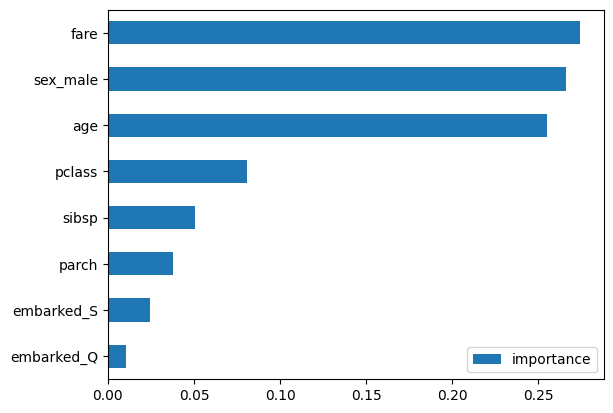

In [ ]:
rf_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
rf_importance.sort_values(by='importance', ascending=True).plot(kind='barh')